# MMAI 894 - Deep Learning
## Dr. Ofer Shai
### Vehicle Detection Model - Bonus
### Team Bloor


### 1. Import Modules and Libraries

In [ ]:
# Install module for importing Keras Tuner

!pip install -q -U keras-tuner

In [ ]:
# Import modules
from sklearn.datasets import fetch_openml
import numpy as np
from numpy import expand_dims
from sklearn.model_selection import train_test_split

# For windows laptops add following 2 lines:
import matplotlib
matplotlib.use('agg')

import matplotlib.pyplot as plt

from matplotlib.pyplot import imshow
%matplotlib inline

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tqdm import tqdm
import os
import random as rn
import cv2
from tensorflow.keras.losses import CategoricalCrossentropy, BinaryCrossentropy
from keras.utils.np_utils import to_categorical
import kerastuner as kt

np.random.seed(123)
tf.random.set_seed(123)

### 2. Load Data


*   Data is loaded from Dropbox
*   There are two (2) datasets that will be uploaded as zipped files and then unzipped in this notebook



In [ ]:
!wget https://www.dropbox.com/s/1mi4a7urdwdlh1u/NoVehicle.zip?dl=0

--2021-03-30 18:18:05--  https://www.dropbox.com/s/1mi4a7urdwdlh1u/NoVehicle.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6027:18::a27d:4812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/1mi4a7urdwdlh1u/NoVehicle.zip [following]
--2021-03-30 18:18:05--  https://www.dropbox.com/s/raw/1mi4a7urdwdlh1u/NoVehicle.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc289633744483d4d713242ac6de.dl.dropboxusercontent.com/cd/0/inline/BLq6XWnslNvzttzupWoMyt75RY5ygcpyt8_afqRib6QRHEoZX_RiA-HImMo9pG0QTVniUPodHuGxK1Fz8nRSZnoSqjQK3ldN1kECSlJXsxuVNESe_kFjx3DZKzVStStu4hUJ-xYiZK4qNCUyUsT4mE_m/file# [following]
--2021-03-30 18:18:06--  https://uc289633744483d4d713242ac6de.dl.dropboxusercontent.com/cd/0/inline/BLq6XWnslNvzttzupWoMyt75RY5ygcpyt8_afqRib6QRHEoZX_RiA-HImMo9pG0QTVniUPodHuGxK1F

In [ ]:
!wget https://www.dropbox.com/s/s1xpr53x7ejvdlr/Vehicle.zip?dl=0

--2021-03-30 18:18:28--  https://www.dropbox.com/s/s1xpr53x7ejvdlr/Vehicle.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6027:18::a27d:4812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/s1xpr53x7ejvdlr/Vehicle.zip [following]
--2021-03-30 18:18:28--  https://www.dropbox.com/s/raw/s1xpr53x7ejvdlr/Vehicle.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc47fbfcda1e06a681f512d087ec.dl.dropboxusercontent.com/cd/0/inline/BLoeA2FOYhB9fP2ZX-oI9w0oWZR3EekXzEMFbtcWI0k6LpZH2e3ayhgB_H_NxrIKfDampJ_8e_l3pQQ-Rzz9bRgkoacOzL8kjDNe-ym_9YSe23jVLxW9TAv8RCEtqseHRXddGB0duz3TByrOLRAIq4SW/file# [following]
--2021-03-30 18:18:29--  https://uc47fbfcda1e06a681f512d087ec.dl.dropboxusercontent.com/cd/0/inline/BLoeA2FOYhB9fP2ZX-oI9w0oWZR3EekXzEMFbtcWI0k6LpZH2e3ayhgB_H_NxrIKfDampJ_8e_l3pQQ-Rzz9b

In [ ]:
# Unzip the No Vehicles dataset
# Use '%%capture' to hide output

%%capture
!unzip -o '/content/NoVehicle.zip?dl=0'

In [ ]:
# Unzip the Vehicles dataset
# Use '%%capture' to hide output

%%capture
!unzip -o '/content/Vehicle.zip?dl=0'

### 3. Data Preprocessing

The following steps will be taken to preprocess the data:
1.   Read in the images from the datasets and resize them
2.   Assign each image a label (i.e. No Vehicle vs Vehicle)
3.   Plot sample images to assure the labels have been assigned correctly
4.   Encode the labels
5. Split the data into training and test sets



In [ ]:
# This function reads in the images one at a time through the 'for' loop and resizes them and assigns a label

def make_train_data(label,DIR):
    for img in tqdm(os.listdir(DIR)):
        try:
            path = os.path.join(DIR,img)
            img = cv2.imread(path,cv2.IMREAD_COLOR)
            img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))

            X.append(np.array(img))
            Z.append(str(label))
        except:
            pass

In [ ]:
# Running the 'make_train_data' function defined above on the two (2) datasets
# X will be a list of images, stored as an array
# Z will be a list of labels 

X=[]
Z=[]
IMG_SIZE=250

no_vehicle='../content/NoVehicle/'
vehicle='../content/Vehicle/'

make_train_data('NO VEHICLE',no_vehicle)
make_train_data('VEHICLE',vehicle)

100%|██████████| 321/321 [00:02<00:00, 118.59it/s]


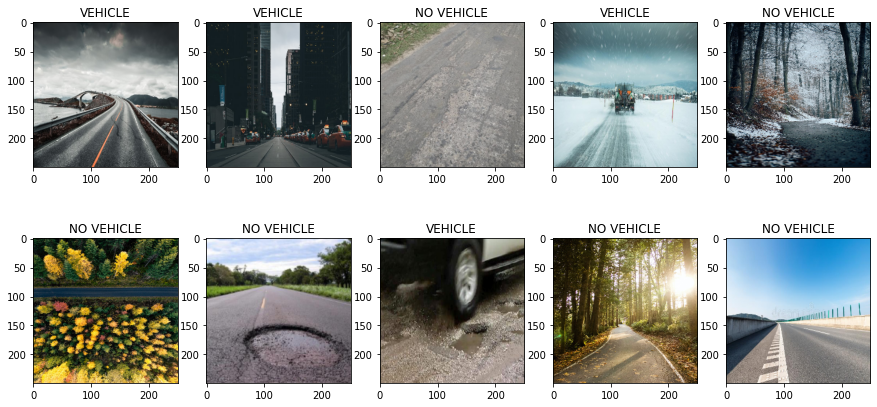

In [ ]:
# Plotting ten (10) randomly selected images, along with their assigned labels as the title

fig,ax=plt.subplots(2,5)
plt.subplots_adjust(bottom=0.3, top=0.7, hspace=0)
fig.set_size_inches(15,15)

for i in range(2):
    for j in range (5):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l][:,:,::-1])
        ax[i,j].set_title(Z[l])
        ax[i,j].set_aspect('equal')

In [ ]:
# Encoding the labels and assigning the encoded labels to 'Y'

from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

le=LabelEncoder()
Y=le.fit_transform(Z)

print(Y)

# Normalize the X values using L2 normalization
X=np.array(X)
X=X/255

# Split data into training and test sets
# Assigning 15% of the data to the test sets and remaining to the training sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.05, random_state=42)

[0 0 0 ... 1 1 1]


In [ ]:
# Printing shapes of X, X_train, and X_test to assure the split was done correctly

print(X.shape)
print(X_train.shape)
print(X_test.shape)

(1534, 250, 250, 3)
(1457, 250, 250, 3)
(77, 250, 250, 3)


### 4. Modelling - Training and Building Model


*   Building the model architecture and defining hyperparameters to be tuned
*   Running a search to find the optimal hyperparameter values
*   Building the model using the optimal hyperparameter values



In [ ]:
# Building model inside a 'model_builder' function, which will be used in the hyperparameter tuner

def model_builder(hp):
  model = Sequential()

  # Tune the number of filters and dropout in the first convolution layer
  hp_filt1 = hp.Choice('filters1', values=[16,32,64])  
  hp_do1 = hp.Choice('do1', values=[0.1,0.2,0.3])

  model.add(Conv2D(filters = hp_filt1, kernel_size = (5,5), padding = 'Same', activation ='relu', input_shape = (250, 250, 3)))
  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(Dropout(hp_do1))

  # Tune the number of filters and in the second convolution layer
  hp_filt2 = hp.Choice('filters2', values=[16,32,64]) 
  
  model.add(Conv2D(filters = hp_filt2, kernel_size = (3,3), padding = 'Same', activation ='relu'))
  model.add(MaxPool2D(pool_size=(2,2)))

  model.add(Flatten())

  # Tune the number of units in the first Dense layer, between 32 and 512
  hp_units = hp.Int('units', min_value=32, max_value=320, step=32)

  model.add(Dense(units=hp_units, activation='relu'))
  
  model.add(Dense(1,  activation = "sigmoid"))

  # Tune the learning rate
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

  model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate = hp_learning_rate), metrics=['accuracy'])

  model.summary()

  return model

In [ ]:
# Defining a tuner using Keras Tuner Hyperband to find the optimal hyperparameter values

tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=50,
                     factor=3,
                     seed=123,
                     overwrite=True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 250, 250, 16)      1216      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 125, 125, 16)      0         
_________________________________________________________________
dropout (Dropout)            (None, 125, 125, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 16)      2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 61504)             0         
_________________________________________________________________
dense (Dense)                (None, 32)                1

In [ ]:
# Defining an early stop to stop the model training if the validation loss starts to increase
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [ ]:
# Running the search function to find the optimal hyperparameter values
tuner.search(X_train, Y_train, epochs=50, validation_split=0.15, callbacks=[stop_early])

# Getting the optimal hyperparameters and assigning them to 'best_hps'
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

# Printing the optimal hyperparameter values after the search is complete
print(f"""
The hyperparameter search is complete:
Optimal number of filters for layer 1: {best_hps.get('filters1')}
Optimal dropout rate for layer 1: {best_hps.get('do1')}

Optimal number of filters for layer 2: {best_hps.get('filters2')}

The optimal number of units in the first dense layer is {best_hps.get('units')}
The optimal learning rate for the optimizer is {best_hps.get('learning_rate')}
""")

Trial 90 Complete [00h 00m 16s]
val_accuracy: 0.8082191944122314

Best val_accuracy So Far: 0.8310502171516418
Total elapsed time: 00h 15m 37s
INFO:tensorflow:Oracle triggered exit

The hyperparameter search is complete:
Optimal number of filters for layer 1: 32
Optimal dropout rate for layer 1: 0.3

Optimal number of filters for layer 2: 64

The optimal number of units in the first dense layer is 160
The optimal learning rate for the optimizer is 0.0001



In [ ]:
# Build the model with the optimal hyperparameters and training it on the data for 50 epochs
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train, Y_train, epochs=50, validation_split=0.15)

# Finding the optimal number of epochs based on the validation accuracy
val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 250, 250, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 125, 125, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 125, 125, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 246016)            0         
_________________________________________________________________
dense (Dense)                (None, 160)               3

In [ ]:
# Rebuilding the model using the optimal hyperparameter values under the name 'hypermodel'
hypermodel = tuner.hypermodel.build(best_hps)

# Retrain the 'hypermodel' using the optimal number of epochs
hypermodel.fit(X_train, Y_train, epochs=best_epoch, validation_split=0.15)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 250, 250, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 125, 125, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 125, 125, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 246016)            0         
_________________________________________________________________
dense (Dense)                (None, 160)               3

### 5. Model Evaluation

In [ ]:
# Evaluate model
# This model has trained on the full 50 epochs

test_loss, test_accuracy = model.evaluate(X_test, Y_test)

print("Test Loss: {:.3f}, Test Accuracy: {:.3f}".format(test_loss, test_accuracy))


3/3 [==============================] - 0s 39ms/step - loss: 0.8628 - accuracy: 0.8312
Test Loss: 0.863, Test Accuracy: 0.831


In [ ]:
# Evaluate hypermodel
# Trained on the "best_epoch" number of epochs

test_loss, test_accuracy = hypermodel.evaluate(X_test, Y_test)

print("Test Loss: {:.3f}, Test Accuracy: {:.3f}".format(test_loss, test_accuracy))


3/3 [==============================] - 0s 9ms/step - loss: 0.4318 - accuracy: 0.8312
Test Loss: 0.432, Test Accuracy: 0.831


In [ ]:
# Generate Classification Report
from sklearn.metrics import classification_report

y_pred = hypermodel.predict(X_test)

target_names = ['No Vehicle', 'Vehicle']

print(classification_report(Y_test, y_pred.round(), target_names=target_names))

              precision    recall  f1-score   support

  No Vehicle       0.86      0.95      0.90        63
     Vehicle       0.57      0.29      0.38        14

    accuracy                           0.83        77
   macro avg       0.71      0.62      0.64        77
weighted avg       0.81      0.83      0.81        77



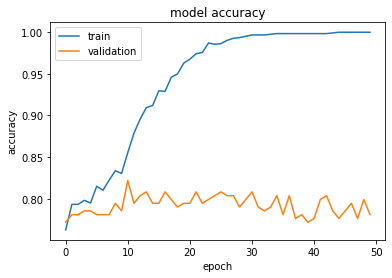

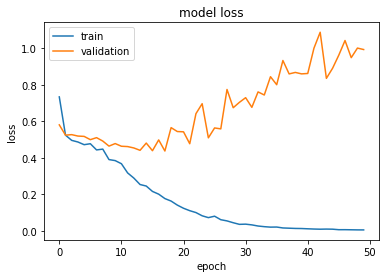

In [ ]:
# Plot training and validation accuracy and loss over epochs

#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

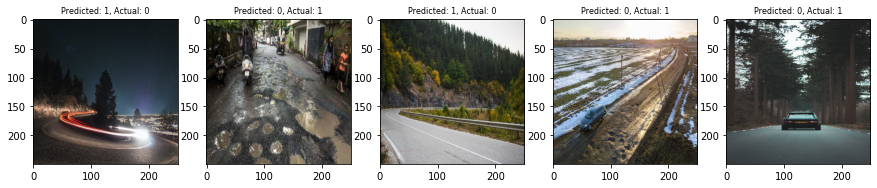

In [ ]:
# Plotting incorrect predictions

# Assigning the predicted and actual outputs to a class (0 or 1)
Y_pred_classes = y_pred.round()
Y_test_classes = Y_test.round()

# Creating a blank list for all incorrect predictions
inc_pred = []
    
# Comparing the predicted and actual outputs and adding the index of the incorrect predictions to the inc_pred list
for x in range(0,len(Y_pred_classes)):
  if Y_pred_classes[x] != Y_test_classes[x]:
    inc_pred.append(x)

# Creating a sample of the first five (5) incorrect predictions
inc_pred_sample = inc_pred[:5]
inc_pred_sample2 = inc_pred[5:10]

# Plotting the sample of five (5) incorrect predictions
n_plots = len(inc_pred_sample2)

f, ax2=plt.subplots(1, 5, figsize=(20,20))
plt.subplots_adjust(bottom=0.3, top=0.7, hspace=0)
f.set_size_inches(15,15)

for i in range(0,n_plots):
    value = X_test[inc_pred_sample2[i]][:,:,::-1]
    ax2[i].imshow(value.reshape(250,250,3))
    ax2[i].set_title("Predicted: {}, Actual: {}".format(int(Y_pred_classes[inc_pred_sample2[i]][0]),Y_test_classes[inc_pred_sample2[i]]), fontsize=8)
    ax2[i].set_aspect('equal')
